In [6]:
# importing the necessary libraries
#for mathematical computationimport numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import plotly 
#import plotly.express as px
#% matplotlib inline

df = pd.read_csv('data/spotify_dataset.csv')

In [7]:
print(df.head(5))

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [8]:
#data info
df.info()#Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [9]:
#artists sorted from most to least popular (popularity in relation to artist)
df_popularArtists = df.groupby('artist').sum().sort_values('popularity', ascending=False)
df_popularArtists = df_popularArtists.reset_index()
df_popularArtists

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Rihanna,Pon de ReplaySOSUnfaithfulUmbrellaShut Up And ...,5887298,8,50247,1803,16.482,16.844,123,-137.276,14,1.9983,3.811065,0.153460,3.7089,13.0940,3128.082,"hip hop, pop, R&Bhip hop, pop, R&Bhip hop, pop..."
1,Eminem,The Real Slim ShadyStanWithout Me'Till I Colla...,5939050,20,42123,1519,15.603,16.374,113,-83.568,9,4.6724,2.212270,0.001437,4.0052,11.4526,2360.762,hip hophip hophip hophip hophip hophip hophip ...
2,Drake,ForeverBest I Ever HadOverFind Your LoveHeadli...,5337202,18,46334,1424,16.859,13.767,120,-164.954,15,3.7478,1.995427,0.100460,3.8368,10.3514,2812.323,"hip hop, pop, R&Bhip hop, pop, R&Bhip hop, pop..."
3,Calvin Harris,Acceptable in the 80'sI'm Not Alone - Radio Ed...,4546171,1,40269,1356,13.719,17.429,118,-77.276,6,1.1381,1.559682,1.041232,4.3994,12.3440,2502.882,"hip hop, pop, Dance/Electronichip hop, pop, Da..."
4,Britney Spears,Oops!...I Did It AgainBorn to Make You HappyLu...,4149701,1,38095,1198,13.457,14.198,113,-104.603,9,1.3786,4.452690,0.028039,2.8750,12.9200,2162.666,poppoppoppoppoppoppoppoppoppoppoppoppoppoppopp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,Silentó,Watch Me (Whip / Nae Nae),185131,0,2015,0,0.819,0.768,8,-8.522,1,0.1340,0.234000,0.000000,0.3340,0.9640,139.982,hip hop
831,Storm Queen,Look Right Through - MK Vocal Edit,150400,0,2014,0,0.832,0.815,0,-8.035,0,0.0810,0.003040,0.005530,0.2630,0.5190,119.995,Dance/Electronic
832,AJR,Weak,201160,0,2017,0,0.673,0.637,5,-4.518,1,0.0429,0.137000,0.000000,0.1840,0.6780,123.980,rock
833,The Lumineers,Ophelia,160097,0,2016,0,0.664,0.576,5,-6.429,1,0.0286,0.630000,0.000198,0.0902,0.6210,76.026,"pop, Folk/Acoustic"


Text(0, 0.5, 'Popularity of the Song')

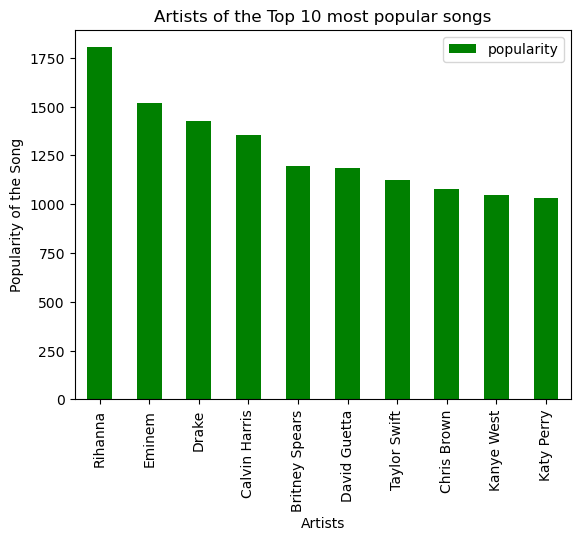

In [10]:
# visualize top 10 popularArtists
topPopularArtists = df_popularArtists.head(10)
topPopularArtists.plot(x='artist', y='popularity', kind = 'bar', color = 'green')

plt.title('Artists of the Top 10 most popular songs')
plt.xlabel('Artists')
plt.ylabel('Popularity of the Song')


#klären in was für einer "Einheit" Popularity ist!!!!!

Text(0, 0.5, 'Popularity')

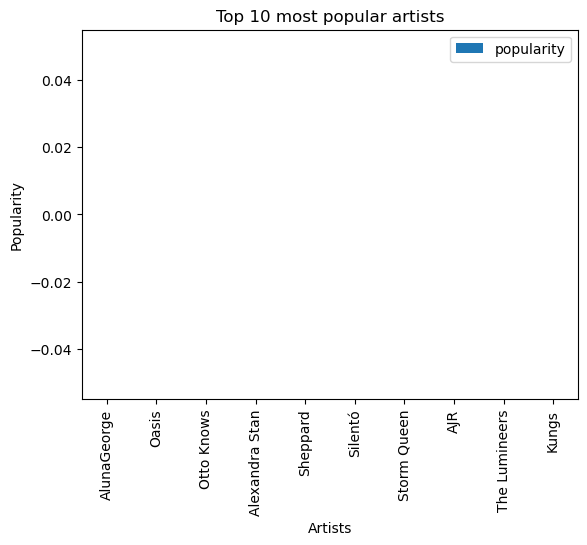

In [11]:
# visualize top 10 popularArtists
leastPopularArtists = df_popularArtists.tail(10)
leastPopularArtists.plot(x='artist', y='popularity', kind = 'bar')

plt.title('Top 10 most popular artists')
plt.xlabel('Artists')
plt.ylabel('Popularity')


#bisschen unnötig, man sieht ja sowieso nichts

Text(0, 0.5, 'Popularity of the Song')

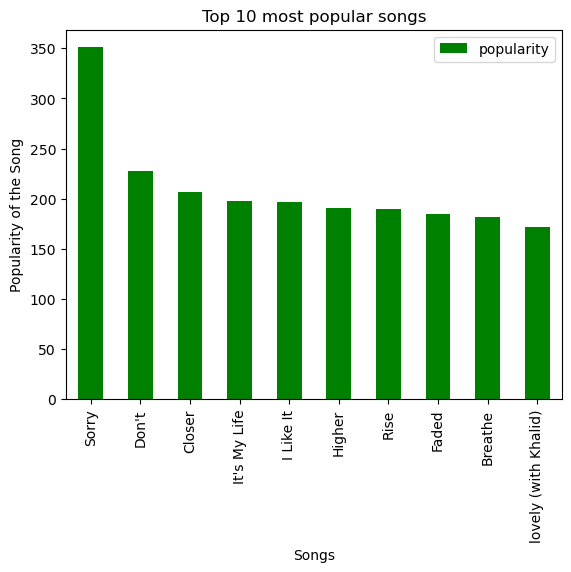

In [12]:
#artists sorted from most to least popular (popularity in relation to artist)
df_popularSongs = df.groupby('song').sum().sort_values('popularity', ascending=False)
df_popularSongs = df_popularSongs.reset_index()
df_popularSongs

# visualize top 10 popularSongs
topPopularSongs = df_popularSongs.head(10)
topPopularSongs.plot(x='song', y='popularity', kind = 'bar', color = 'green')

plt.title('Top 10 most popular songs')
plt.xlabel('Songs')
plt.ylabel('Popularity of the Song')

#!!falls zeit, gucken ob man da auch noch den Artist dazuschreiben kann!!

/var/folders/xn/p26v9yc56vxgql50hn5mfjgh0000gn/T/ipykernel_79261/2019703380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genre"][df["genre"] == "[]"] = np.nan


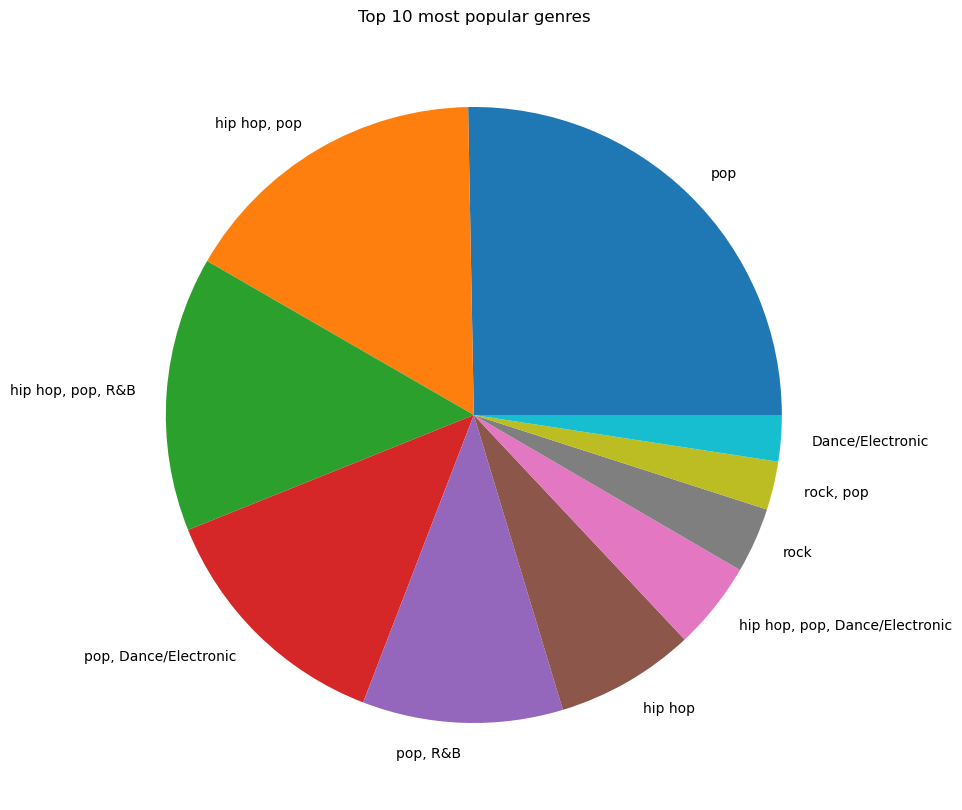

In [13]:
df['genre']=df['genre'].astype(str)
df["genre"][df["genre"] == "[]"] = np.nan
df["genre"] = df["genre"].fillna(0)

#prces
df.genre=df.genre.str.replace("[", "")
df.genre=df.genre.str.replace("]", "")
df.genre=df.genre.str.replace("'", "")

df=df.explode('genre')
df

fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.genre.value_counts()[:10].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 10 most popular genres")
plt.show()

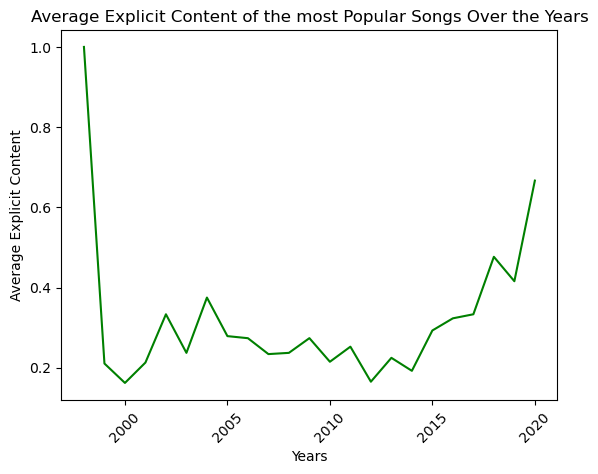

In [14]:
# Grouping the data by 'years' and calculating the average explicit content for each year
explicit_content_by_year = df.groupby('year')['explicit'].mean().reset_index()

# Sorting the data by 'years' in ascending order
explicit_content_by_year = explicit_content_by_year.sort_values('year', ascending=True)

# Creating the plot
plt.plot(explicit_content_by_year['year'], explicit_content_by_year['explicit'], color  = 'green')
plt.xlabel('Years')
plt.ylabel('Average Explicit Content')
plt.title('Average Explicit Content of the most Popular Songs Over the Years')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Popularity of Each Mode')

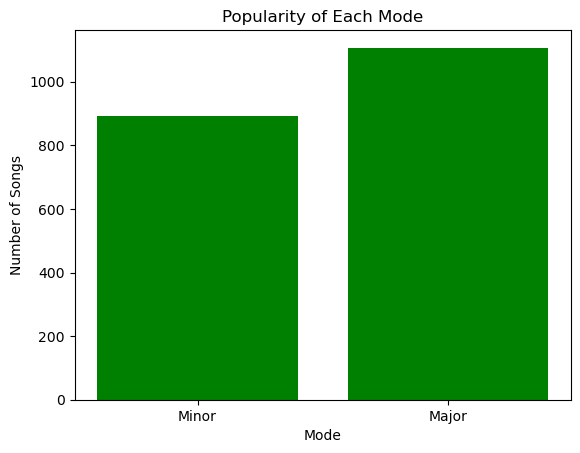

In [15]:
popularityMode = df.groupby('mode').size().reset_index(name='count')
popularityMode['mode'] = popularityMode['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
plt.bar(popularityMode['mode'], popularityMode['count'], color = 'green')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.title('Popularity of Each Mode')

/var/folders/xn/p26v9yc56vxgql50hn5mfjgh0000gn/T/ipykernel_79261/1842033611.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,1,1)


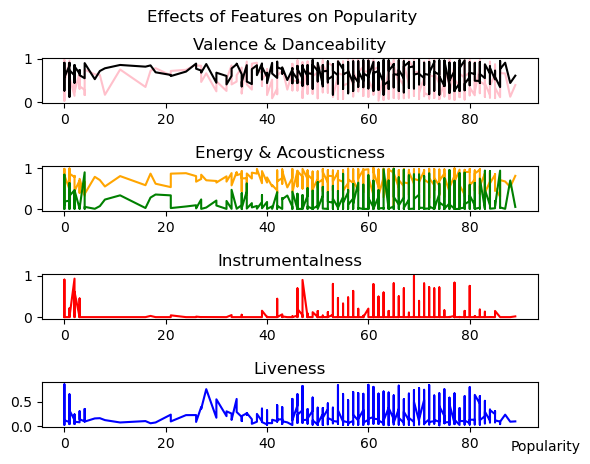

In [16]:
sorted_df = df.sort_values('popularity', ascending = False)
plt.plot(500, 10)
plt.xlabel= 'Popularity'

#plot valence
plt.subplot(7,1,1)
plt.plot(sorted_df['popularity'], sorted_df['valence'], color = 'pink')
plt.title('Valence & Danceability')

#plot danceability
plt.subplot(7,1,1)
plt.plot(sorted_df['popularity'], sorted_df['danceability'], color = 'black')

#plot energy
plt.subplot(7,1,3)
plt.plot(sorted_df['popularity'], sorted_df['energy'], color = 'orange')
plt.title('Energy & Acousticness')

#plot acousticness
plt.subplot(7,1,3)
plt.plot(sorted_df['popularity'], sorted_df['acousticness'], color = 'green')

#plot instrumentalness
plt.subplot(7,1,5)
plt.plot(sorted_df['popularity'], sorted_df['instrumentalness'], color = 'red')
plt.title('Instrumentalness')

#plot liveness
plt.subplot(7,1,7)
plt.plot(sorted_df['popularity'], sorted_df['liveness'], color = 'blue')
plt.title('Liveness')





plt.text(95,-0.5,"Popularity", ha="center")
plt.suptitle("Effects of Features on Popularity")
plt.show()


/var/folders/xn/p26v9yc56vxgql50hn5mfjgh0000gn/T/ipykernel_79261/3437129734.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


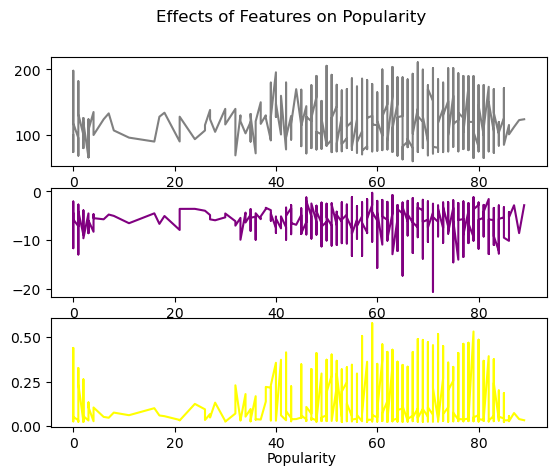

In [17]:
sorted_df = df.sort_values('popularity', ascending = False)
plt.plot(100, 2)
plt.ylabel= 'Popularity'

#Plot tempo
plt.subplot(3, 1, 1)
plt.plot(sorted_df['popularity'], sorted_df['tempo'], color = 'grey')

#plot loudness
plt.subplot(3,1,2)
plt.plot(sorted_df['popularity'], sorted_df['loudness'], color = 'purple')

#plot speechiness
plt.subplot(3,1,3)
#normalize values of speechiness
plt.plot(sorted_df['popularity'], sorted_df['speechiness'], color = 'yellow')

plt.text(45,-0.2,"Popularity", ha="center")
plt.suptitle("Effects of Features on Popularity")
plt.show()

In [18]:
info = df.drop(['key','mode','explicit'], axis=1).corr(method = 'pearson')
map = sns.heatmap(info, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='White',square = False, annot_kws={"fontsize": 14})
map.set_title('Correlation Heatmap')
map.set_xticklabels(map.get_xticklabels(), rotation=90)



ValueError: could not convert string to float: 'Britney Spears'